#用因子分析降维

因子分析（factor analysis）是另一种降维方法。与PCA不同的是，因子分析有假设而PCA没有假设。因子分析的基本假设是有一些隐藏特征与数据集的特征相关。

这个主题将浓缩（boil down）样本数据集的显性特征，尝试像理解因变量一样地理解自变量之间的隐藏特征。

<!-- TEASER_END -->

##Getting ready

让我们再用`iris`数据集来比较PCA与因子分析，首先加载因子分析类：

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.decomposition import FactorAnalysis

##How to do it...

从编程角度看，两种方法没啥区别：

In [6]:
fa = FactorAnalysis(n_components=2)
iris_two_dim = fa.fit_transform(iris.data)
iris_two_dim[:5]

array([[-1.33125848,  0.55846779],
       [-1.33914102, -0.00509715],
       [-1.40258715, -0.307983  ],
       [-1.29839497, -0.71854288],
       [-1.33587575,  0.36533259]])

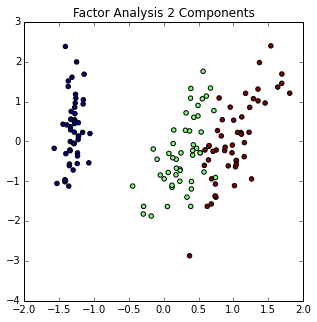

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
f = plt.figure(figsize=(5, 5))
ax = f.add_subplot(111)
ax.scatter(iris_two_dim[:,0], iris_two_dim[:, 1], c=iris.target)
ax.set_title("Factor Analysis 2 Components")

由于因子分析是一种概率性的转换方法，我们可以通过不同的角度来观察，例如模型观测值的对数似然估计值，通过模型比较对数似然估计值会更好。

因子分析也有不足之处。由于你不是通过拟合模型直接预测结果，拟合模型只是一个中间步骤。这本身并非坏事，但是训练实际模型时误差就会产生。

##How it works...

因子分析与前面介绍的PCA类似。但两者有一个不同之处。PCA是通过对数据进行线性变换获取一个能够解释数据变量的主成分向量空间，这个空间中的每个主成分向量都是正交的。你可以把PCA看成是$N$维数据集降维成$M$维，其中$M \lt N$。

而因子分析的基本假设是，有$M$个重要特征和它们的线性组合（加噪声），能够构成原始的$N$维数据集。也就是说，你不需要指定结果变量（就是最终生成$N$维），而是要指定数据模型的因子数量（$M$个因子）。